# Project: Employee Engagement Segmentation using RFM Analysis

In [2]:
# importing basic libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip list

Package                           Version
--------------------------------- ------------------
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.16.4
altair                            5.0.1
altair-data-server                0.4.1
altair-viewer                     0.4.0
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow            

In [4]:
import matplotlib
print(matplotlib.__version__)  # should print 3.7.3

3.7.3


In [5]:
df = pd.read_csv('employee_engagement_rfm_dataset.csv')
df.head(2)

,EmployeeID,Name,Gender,DateOfBirth,JoinDate,LastEngagementDate,Department,JobTitle,Country,EngagementCount,TotalEngagementMinutes,TrainingSessions,EngagementActivities,HealthIssue,SickLeaves,Salary,PerformanceRating
0,E0001,Allison Hill,Non-binary,1979-09-24,2017-11-30,2024-03-06,Data Science,Data Analyst,Australia,5,235,2.0,Training,Diabetes,2,157835.39,4.2
1,E0002,Patrick Gardner,Non-binary,1993-04-02,2016-01-30,2016-08-02,Data Science,DevOps Engineer,Germany,4,128,3.0,Hackathon,Diabetes,1,77225.74,4.0


In [6]:
df.shape

(520, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              520 non-null    object 
 1   Name                    520 non-null    object 
 2   Gender                  520 non-null    object 
 3   DateOfBirth             520 non-null    object 
 4   JoinDate                520 non-null    object 
 5   LastEngagementDate      520 non-null    object 
 6   Department              520 non-null    object 
 7   JobTitle                520 non-null    object 
 8   Country                 520 non-null    object 
 9   EngagementCount         520 non-null    int64  
 10  TotalEngagementMinutes  520 non-null    int64  
 11  TrainingSessions        494 non-null    float64
 12  EngagementActivities    494 non-null    object 
 13  HealthIssue             389 non-null    object 
 14  SickLeaves              520 non-null    in

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
515     True
516     True
517     True
518     True
519     True
Length: 520, dtype: bool

In [9]:
df.duplicated().sum()

17

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.isnull().sum()

EmployeeID                  0
Name                        0
Gender                      0
DateOfBirth                 0
JoinDate                    0
LastEngagementDate          0
Department                  0
JobTitle                    0
Country                     0
EngagementCount             0
TotalEngagementMinutes      0
TrainingSessions           26
EngagementActivities       26
HealthIssue               125
SickLeaves                  0
Salary                      0
PerformanceRating          26
dtype: int64

In [12]:
'''you don’t need to clean the columns that are not used in RFM analysis.
But it's good practice to: Drop irrelevant columns before or after RFM calculation'''

"you don’t need to clean the columns that are not used in RFM analysis.\nBut it's good practice to: Drop irrelevant columns before or after RFM calculation"

In [13]:
'''Metric	Source Column
Recency	    LastEngagementDate
Frequency	EngagementCount
Monetary	TotalEngagementMinutes or Salary

EmployeeID, Name, Gender, DateOfBirth, JoinDate, Country, HealthIssue, SickLeaves, JobTitle — not
directly related to Recency/Frequency/Monetary metrics

'''

'Metric\tSource Column\nRecency\t    LastEngagementDate\nFrequency\tEngagementCount\nMonetary\tTotalEngagementMinutes or Salary\n\nEmployeeID, Name, Gender, DateOfBirth, JoinDate, Country, HealthIssue, SickLeaves, JobTitle — not\ndirectly related to Recency/Frequency/Monetary metrics\n\n'

In [14]:
rfm_df = df[['EmployeeID', 'LastEngagementDate', 'EngagementCount', 'TotalEngagementMinutes']].copy()

In [15]:
rfm_df.head(2)

,EmployeeID,LastEngagementDate,EngagementCount,TotalEngagementMinutes
0,E0001,2024-03-06,5,235
1,E0002,2016-08-02,4,128


In [16]:
rfm_df.shape

(503, 4)

<Axes: >

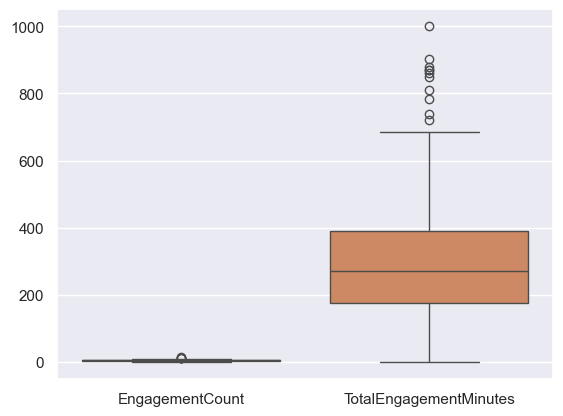

In [17]:
sns.boxplot(data = rfm_df[['EngagementCount', 'TotalEngagementMinutes']])

In [18]:
col=['EngagementCount', 'TotalEngagementMinutes']

for i in col:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    rfm_df = rfm_df[(rfm_df[i] >= lower) & (rfm_df[i] <= upper)]

<Axes: >

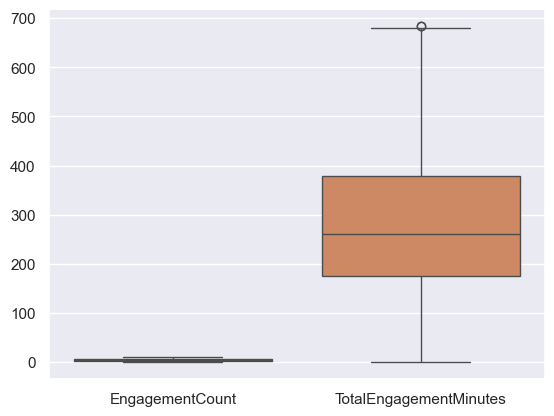

In [19]:
sns.boxplot(data = rfm_df[['EngagementCount', 'TotalEngagementMinutes']])

In [20]:
rfm_df['LastEngagementDate'] = pd.to_datetime(rfm_df['LastEngagementDate'])

In [21]:
rfm_df['LastEngagementDate'].head(2)

0   2024-03-06
1   2016-08-02
Name: LastEngagementDate, dtype: datetime64[ns]

In [22]:
rfm_df.groupby('EmployeeID')['EngagementCount'].sum().sort_values(ascending=False)

EmployeeID
E0250    12
E0056    10
E0091    10
E0296    10
E0105    10
         ..
E0198     1
E0380     0
E0267     0
E0124     0
E0162     0
Name: EngagementCount, Length: 487, dtype: int64

<Axes: title={'center': 'Top 10 Engaged Employees'}, ylabel='EmployeeID'>

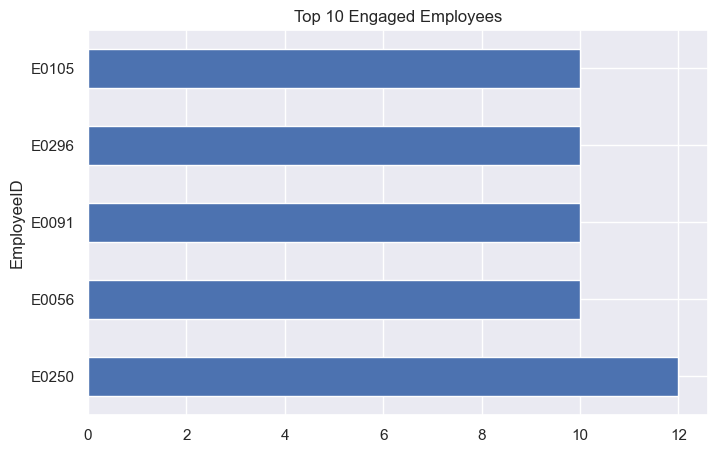

In [23]:
emp_counts = rfm_df.groupby('EmployeeID')['EngagementCount'].sum().sort_values(ascending=False)
emp_counts.head(5).plot(kind='barh', figsize=(8, 5), title='Top 10 Engaged Employees')

In [24]:
rfm_df['EmployeeID'].value_counts()

EmployeeID
E0067    2
E0250    2
E0091    2
E0331    1
E0344    1
        ..
E0164    1
E0163    1
E0162    1
E0161    1
E0500    1
Name: count, Length: 487, dtype: int64

In [25]:
rfm_df['EmployeeID'].nunique()

487

In [26]:
rfm_df.columns

Index(['EmployeeID', 'LastEngagementDate', 'EngagementCount',
       'TotalEngagementMinutes'],
      dtype='object')

In [27]:
rfm_df.groupby('EmployeeID')['TotalEngagementMinutes'].sum().sort_values(ascending=False).head(2)

EmployeeID
E0250    1056
E0091     740
Name: TotalEngagementMinutes, dtype: int64

In [28]:
rfm_df.groupby('EmployeeID')['EngagementCount'].sum().sort_values(ascending=False).head(2)

EmployeeID
E0250    12
E0056    10
Name: EngagementCount, dtype: int64

In [29]:
rfm_df.groupby('EmployeeID')['EngagementCount'].sum().get('E0250')

12

In [30]:
# SET SNAPSHOT DATE
# Choose snapshot date (usually the max date + 1 or a fixed date)
snapshot_date = rfm_df['LastEngagementDate'].max() + pd.Timedelta(days=1)
snapshot_date

Timestamp('2025-07-17 00:00:00')

In [31]:
'''snapshot date is just the "day after the last known engagement,
LastEngagementDate max	2025-07-16
snapshot_date	2025-07-17
Recency for someone who last engaged on 2025-07-10	7 days
'''

'snapshot date is just the "day after the last known engagement,\nLastEngagementDate max\t2025-07-16\nsnapshot_date\t2025-07-17\nRecency for someone who last engaged on 2025-07-10\t7 days\n'

In [32]:
# Calculate RFM Metrics
rfm = rfm_df.groupby('EmployeeID').agg({
    'LastEngagementDate': lambda x: (snapshot_date - x.max()).days,  # Recency in days
    'EngagementCount': 'sum',                                       # Frequency
    'TotalEngagementMinutes': 'sum'                                 # Monetary
}).reset_index()


In [33]:
# Rename columns
rfm.rename(columns={
    'LastEngagementDate': 'Recency',
    'EngagementCount': 'Frequency',
    'TotalEngagementMinutes': 'Monetary'
}, inplace=True)


In [34]:
rfm.to_csv("DEPLOYABLE.csv", index=False)

In [35]:
print(rfm['Monetary'].nunique())

234


In [36]:
#Assign RFM Scores
# Use quantiles to assign scores (1 to 4 or 1 to 5)
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])  # Lower recency = higher score
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

In [37]:
#Combine Scores to Segment
# Combine into a single RFM score
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

# Optional: Define segments
def segment(rfm_score):
    if rfm_score == '444':
        return 'Champions'
    elif rfm_score[0] == '4':
        return 'Recent Engagers'
    elif rfm_score[1] == '4':
        return 'Frequent Engagers'
    elif rfm_score[2] == '4':
        return 'High Value'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(segment)

In [38]:
display(rfm.head())

,EmployeeID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,E0001,498,5,235,3,2,2,322,At Risk
1,E0002,3271,4,128,1,2,1,121,At Risk
2,E0003,194,4,296,4,2,3,423,Recent Engagers
3,E0004,2621,7,329,1,4,3,143,Frequent Engagers
4,E0005,2730,4,324,1,2,3,123,At Risk


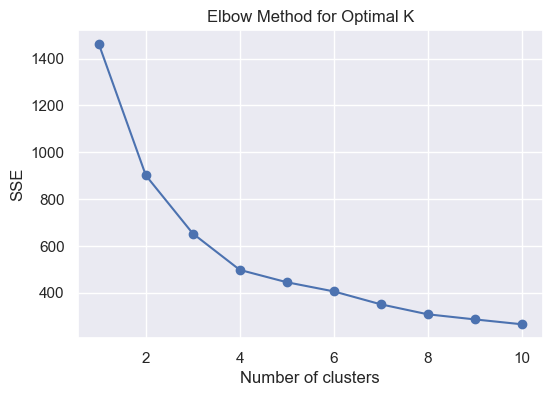

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Standardize the RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Step 2: Find optimal K using Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()


In [40]:
# Fit with chosen K (say k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [41]:
rfm['Cluster']

0      3
1      2
2      3
3      2
4      2
      ..
482    3
483    0
484    1
485    2
486    3
Name: Cluster, Length: 487, dtype: int32

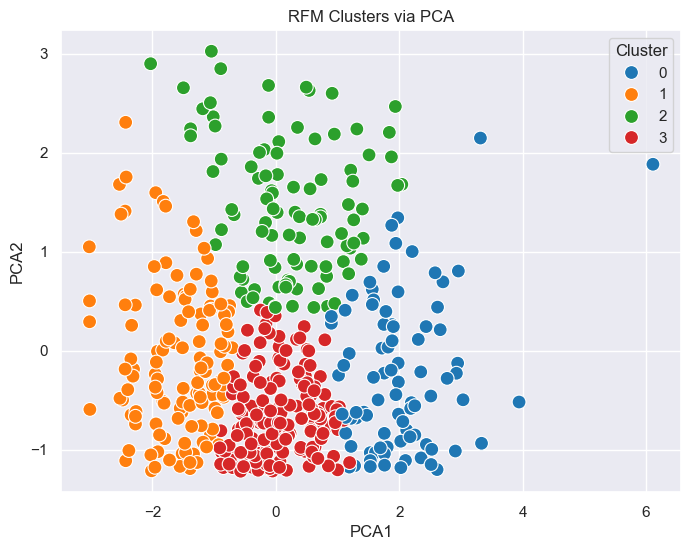

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_comp = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = pca_comp[:, 0]
rfm['PCA2'] = pca_comp[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100)
plt.title("RFM Clusters via PCA")
plt.show()


In [43]:
# Step 4: Save this updated DataFrame
rfm.to_csv("RFM_DEPLOY.csv", index=False)

print(" saved with Cluster, PCA1, PCA2 columns.")

 saved with Cluster, PCA1, PCA2 columns.


In [44]:
import matplotlib
print(matplotlib.__version__)

3.7.3


In [45]:
import matplotlib
print(matplotlib.__file__)


C:\Users\hp\anaconda3\Lib\site-packages\matplotlib\__init__.py
